# SVM Classification with Different Parameters

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed i

### Create the Classification Data Sets

In [2]:
data_sets = []
colors = {0: 'r', 1: 'b'}

In [3]:
d = sklearn.datasets.make_moons(n_samples=2700, noise=0.2)
moons = pd.DataFrame(d[0])
moons.columns = ['x', 'y']
moons['t'] = d[1]

In [4]:
d, t = sklearn.datasets.make_classification(
        n_samples=2700,
        n_features=2,
        n_redundant=0)
classif = pd.DataFrame(d)
classif.columns = ['x', 'y']
classif['t'] = t

In [5]:
d, t = sklearn.datasets.make_circles(
        n_samples=2700,
        noise=0.1,
        factor=0.7)
circles = pd.DataFrame(d)
circles.columns = ['x', 'y']
circles['t'] = t

In [6]:
data_sets = [
     classif,
     moons,
     circles
]

In [7]:
n_points = 400

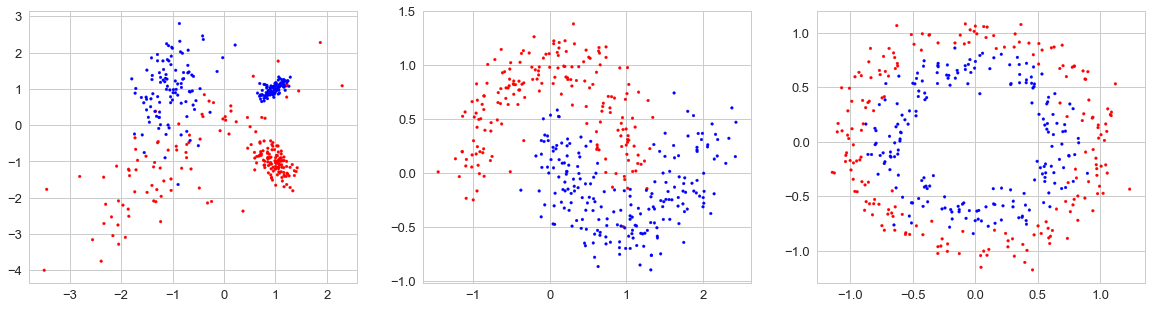

In [8]:
_ = plt.figure(figsize=(20, 5))
for i in range(3):
    _ = plt.subplot(1, 3, i+1)
    _ = plt.scatter(
            data_sets[i][:n_points].x,
            data_sets[i][:n_points].y,
            c=data_sets[i][:n_points].t.map(colors),
            marker='o',
            s=dotsize/2.0,
            label=None)

In [9]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

### Classification with Different SVM Kernels

In [10]:
kernels = [
    'linear',
    'poly',
    'rbf',
    'sigmoid'
]

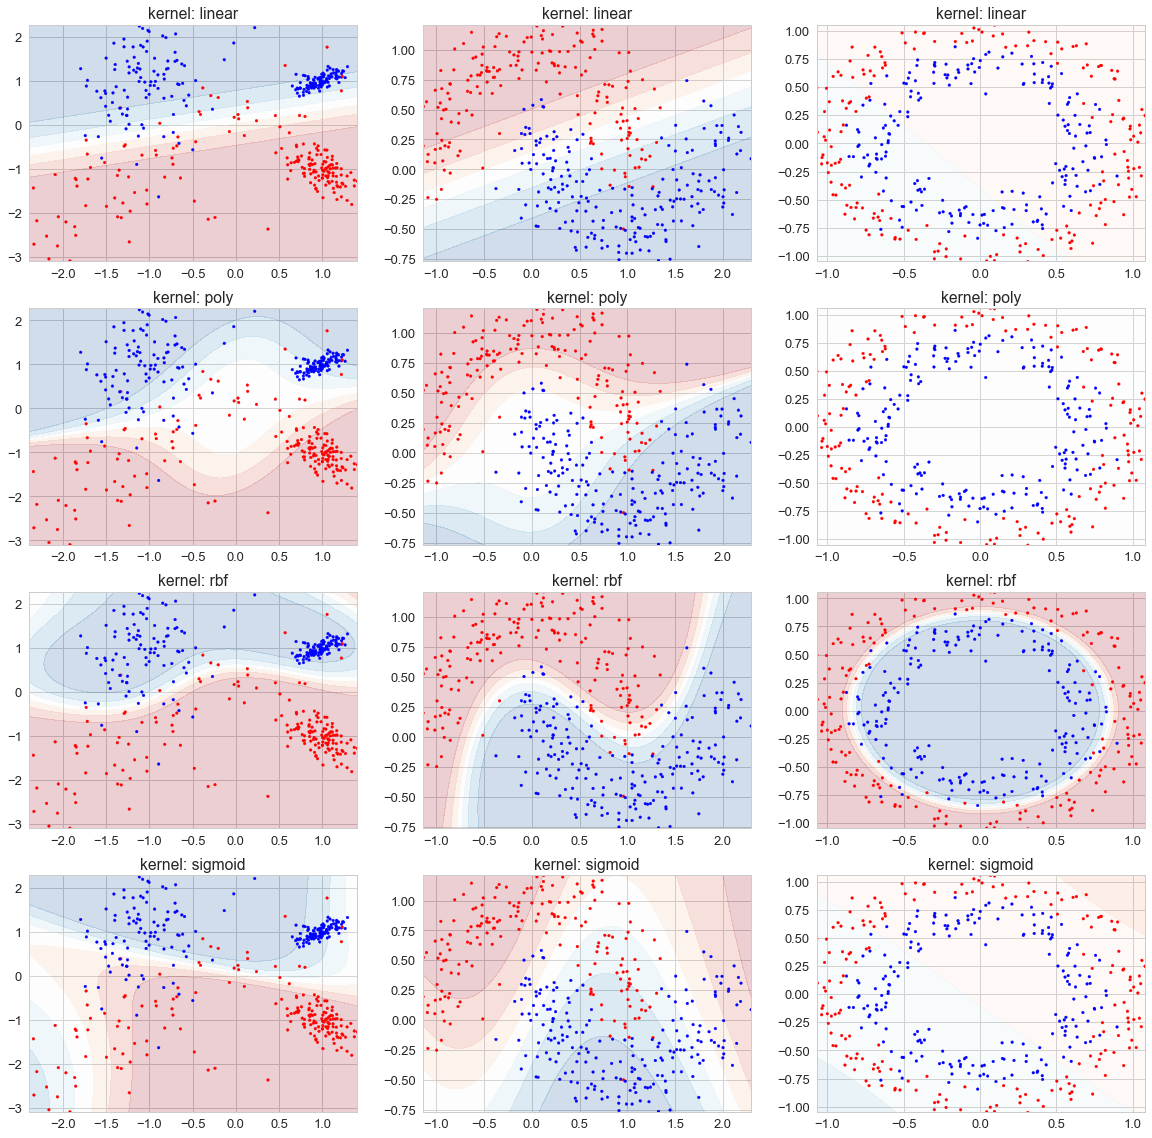

In [11]:
_ = plt.figure(figsize=(20, 5*len(kernels)))

for i in range(len(kernels)):
    
    for j in range(len(data_sets)):

        model = sklearn.svm.SVC(
                    kernel=kernels[i],
                    probability=True)

        model.fit(data_sets[j][:n_points][['x', 'y']], data_sets[j][:n_points].t)

        pred = model.predict(data_sets[j][:n_points][['x', 'y']])

        score = sklearn.metrics.roc_auc_score(data_sets[j][:n_points].t, pred)

        ax = plt.subplot(len(kernels), 3, i*len(data_sets) + j + 1)

        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:n_points].x,
                data_sets[j][:n_points].y,
                c=data_sets[j][:n_points].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:n_points].x.quantile(0.01),
                data_sets[j][:n_points].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:n_points].y.quantile(0.01),
                data_sets[j][:n_points].y.quantile(0.99)))
        _ = plt.title('kernel: ' + str(kernels[i]))

### Classification with Different Data Set Sizes

In [12]:
data_set_sizes = [
    25,
    100,
    400
]

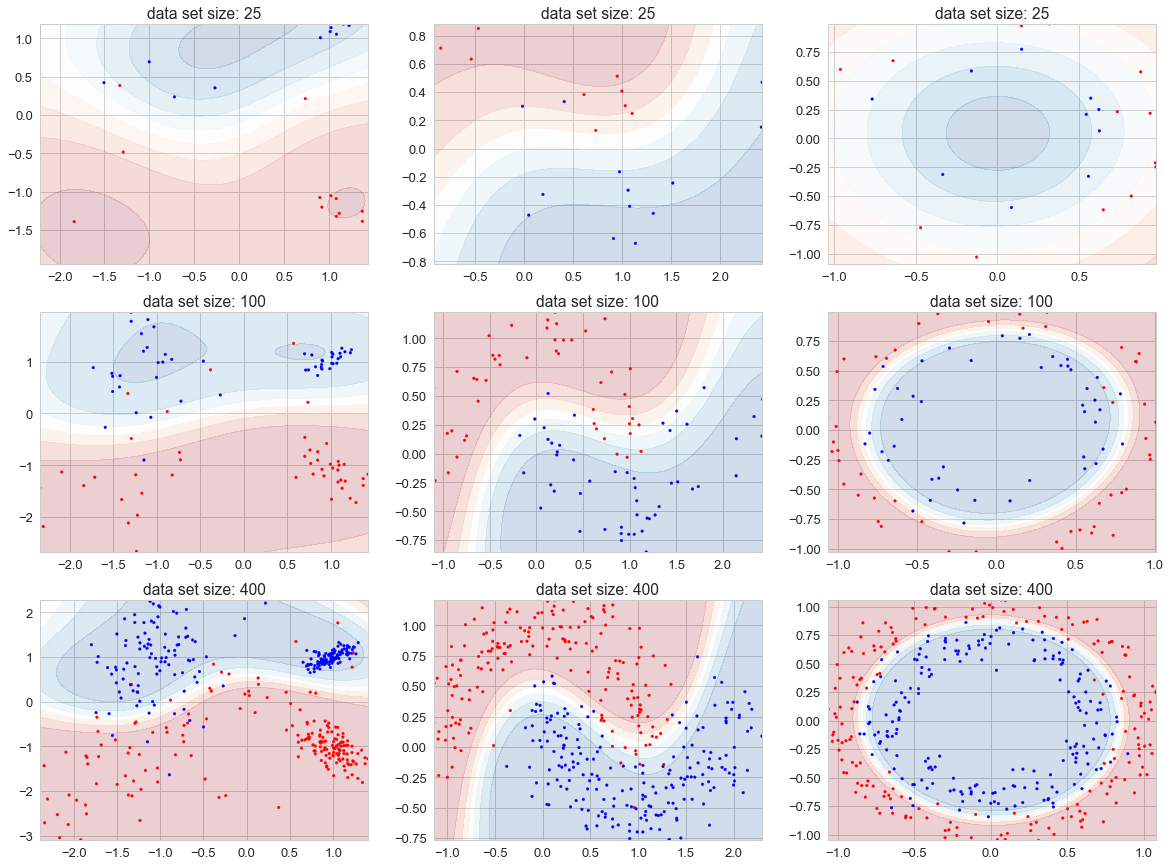

In [13]:
_ = plt.figure(figsize=(20, 5*len(data_set_sizes)))

for i in range(len(data_set_sizes)):
    
    for j in range(len(data_sets)):
    
        model = sklearn.svm.SVC(
                    kernel='rbf',
                    probability=True)

        model.fit(data_sets[j][:data_set_sizes[i]][['x', 'y']], data_sets[j][:data_set_sizes[i]].t)

        pred = model.predict(data_sets[j][:n_points][['x', 'y']])

        score = sklearn.metrics.roc_auc_score(data_sets[j][:n_points].t, pred)

        ax = plt.subplot(len(data_set_sizes), 3, i*len(data_sets) + j + 1)

        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:data_set_sizes[i]].x,
                data_sets[j][:data_set_sizes[i]].y,
                c=data_sets[j][:data_set_sizes[i]].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:data_set_sizes[i]].x.quantile(0.01),
                data_sets[j][:data_set_sizes[i]].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:data_set_sizes[i]].y.quantile(0.01),
                data_sets[j][:data_set_sizes[i]].y.quantile(0.99)))
        _ = plt.title('data set size: ' + str(data_set_sizes[i]))

### Classification with Different Penalties

In [14]:
c_values = [
    0.1,
    1.0,
    10.0,
    100.0,
    1000.0
]

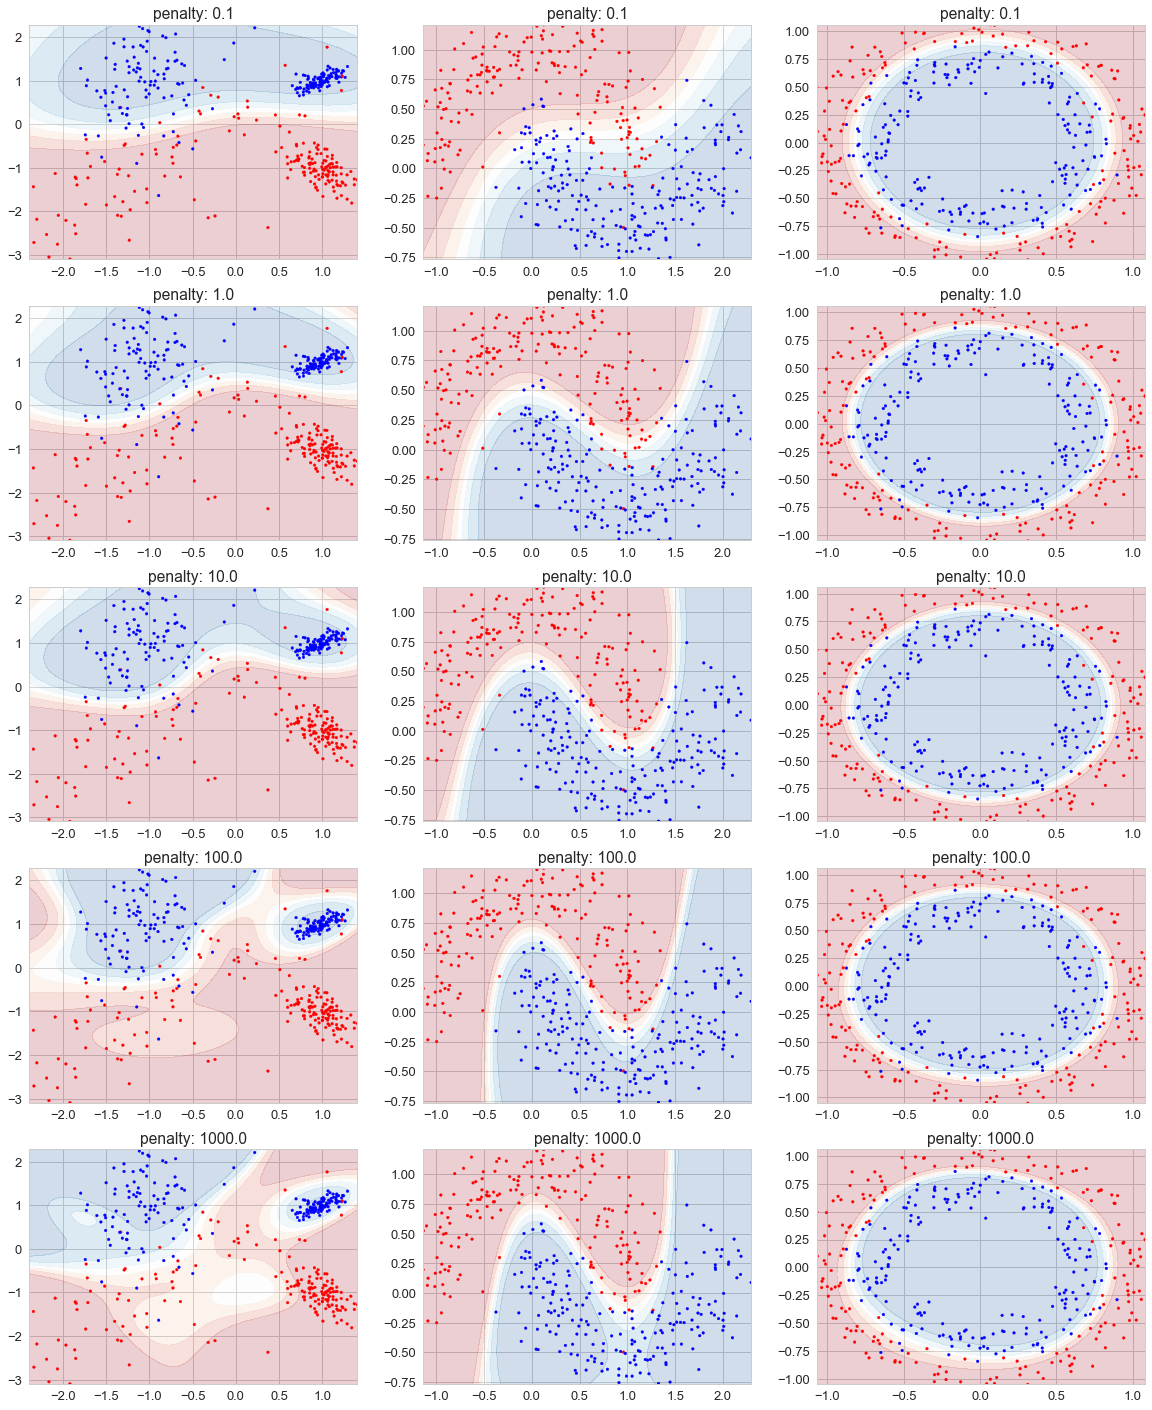

In [15]:
_ = plt.figure(figsize=(20, 5*len(c_values)))

for i in range(len(c_values)):
    
    for j in range(len(data_sets)):

        model = sklearn.svm.SVC(
                    C=c_values[i],
                    kernel='rbf',
                    probability=True)

        model.fit(data_sets[j][:n_points][['x', 'y']], data_sets[j][:n_points].t)

        pred = model.predict(data_sets[j][:n_points][['x', 'y']])

        score = sklearn.metrics.roc_auc_score(data_sets[j][:n_points].t, pred)

        ax = plt.subplot(len(c_values), 3, i*len(data_sets) + j + 1)

        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:n_points].x,
                data_sets[j][:n_points].y,
                c=data_sets[j][:n_points].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:n_points].x.quantile(0.01),
                data_sets[j][:n_points].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:n_points].y.quantile(0.01),
                data_sets[j][:n_points].y.quantile(0.99)))
        _ = plt.title('penalty: ' + str(c_values[i]))